<a href="https://www.kaggle.com/code/carlosmorenogarcia/chord?scriptVersionId=274244518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Creating Chord Diagrams using R

* Code source: https://www.data-to-viz.com/graph/chord.html

In [1]:
## Load libraries
library(tidyverse)
library(networkD3)
library(reshape2)
library(ggplot2)
library(viridis)
library(hrbrthemes)
library(circlize)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘reshape2’




The following object is masked from ‘package:tidyr’:

    smiths




Loading required package: viridisLite



circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [2]:
## Load data
data <- read_csv("/kaggle/input/chord-db-csv/chord.csv", show_col_types = FALSE)

## Creating a Heatmap

In [3]:
## Create an empty canvas
heatmap_colnames=colnames(data)
mat_heatmap = matrix(0, length(data), length(data))
rownames(mat_heatmap) <- colnames(data)
colnames(mat_heatmap) <- colnames(data)

In [4]:
## For loop to count all combinations
# Notice this is different to sankey, as it has to count all rows
for (i in 1:length(data)){
  for (j in 1:length(data)){
    if (i>j){
      for (k in 1:nrow(data)){
        row = data[k,]
        if (is.na(row[i])==FALSE & is.na(row[j])==FALSE){
          if (row[i]=="Yes" & row[j]=="Yes"){
            mat_heatmap[heatmap_colnames[i],heatmap_colnames[j]]=mat_heatmap[heatmap_colnames[i],heatmap_colnames[j]]+1
          }
        }
      }
    }
  }
}

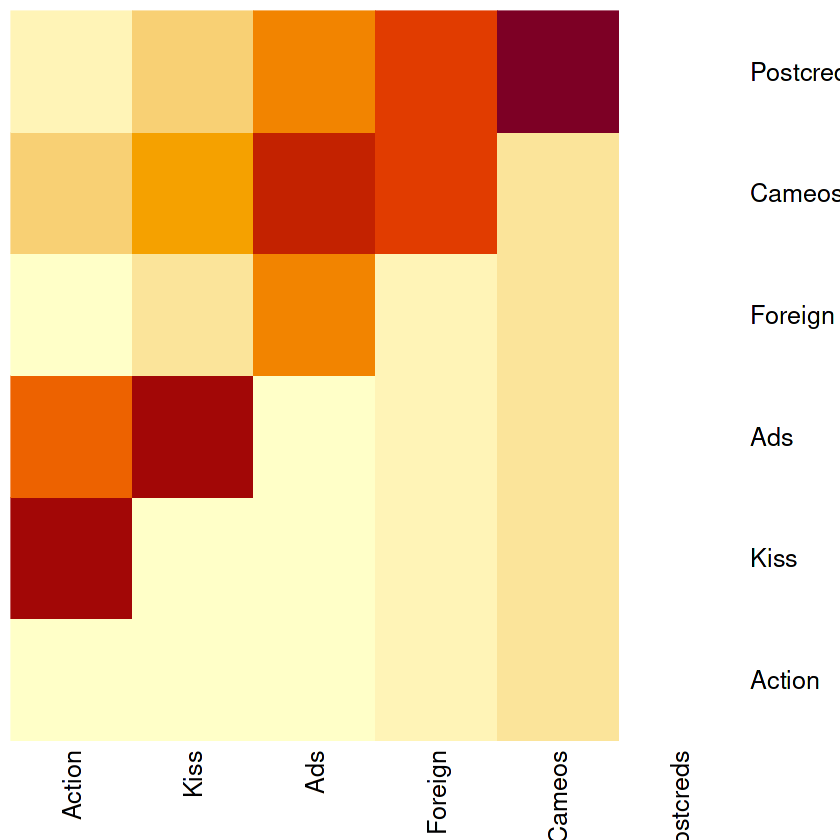

In [5]:
## Simple heatmap (rough idea)
heatmap(mat_heatmap, Colv = NA, Rowv = NA, scale="column")

## Plotting a Chord Diagram (Option 1)

In [6]:
## Convert the heatmap into a dataframe
mat_heatmap = data.frame(mat_heatmap)
## Transform matrix to long data
data_long_chord <- mat_heatmap %>%
  rownames_to_column %>%
  gather(key = 'key', value = 'value', -rowname)

In [7]:
## Basic parameters
circos.clear()
circos.par(start.degree = 90, gap.degree = 4, track.margin = c(-0.1, 0.1), points.overflow.warning = FALSE)
par(mar = rep(0, 4))

In [8]:
## Establish colour palette
mycolor <- viridis(length(unique(data_long_chord$rowname)), 
                   alpha = 1, begin = 0, end = 1, option = "D")
mycolor <- mycolor[sample(1:length(unique(data_long_chord$rowname)))]

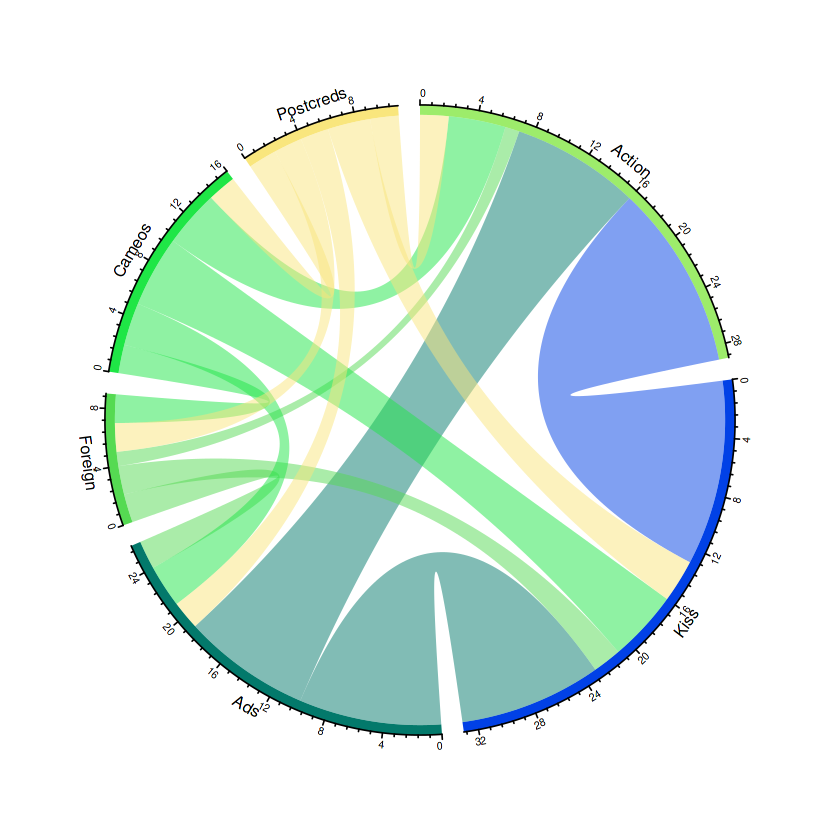

In [9]:
## Base plot
chordDiagram(data_long_chord)

## Plotting a Chord Diagram (Option 2)

* Code source: https://r-graph-gallery.com/chord-diagram-interactive.html?utm_content=cmp-true

In [10]:
## Install packages
devtools::install_github("mattflor/chorddiag")
install.packages("chorddiag")

R6          (2.5.1  -> 2.6.1 ) [CRAN]
fs          (1.6.4  -> 1.6.6 ) [CRAN]
glue        (1.7.0  -> 1.8.0 ) [CRAN]
cli         (3.6.3  -> 3.6.5 ) [CRAN]
digest      (0.6.36 -> 0.6.37) [CRAN]
sass        (0.4.9  -> 0.4.10) [CRAN]
rlang       (1.1.4  -> 1.1.6 ) [CRAN]
mime        (0.12   -> 0.13  ) [CRAN]
yaml        (2.3.8  -> 2.3.10) [CRAN]
xfun        (0.45   -> 0.54  ) [CRAN]
tinytex     (0.51   -> 0.57  ) [CRAN]
knitr       (1.47   -> 1.50  ) [CRAN]
jsonlite    (1.8.8  -> 2.0.0 ) [CRAN]
fontawesome (0.5.2  -> 0.5.3 ) [CRAN]
evaluate    (0.24.0 -> 1.0.5 ) [CRAN]
bslib       (0.7.0  -> 0.9.0 ) [CRAN]
rmarkdown   (2.27   -> 2.30  ) [CRAN]


Installing 17 packages: R6, fs, glue, cli, digest, sass, rlang, mime, yaml, xfun, tinytex, knitr, jsonlite, fontawesome, evaluate, bslib, rmarkdown



Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in i.p(...):
“installation of package ‘R6’ had non-zero exit status”


Warning message in i.p(...):
“installation of package ‘fs’ had non-zero exit status”


Warning message in i.p(...):
“installation of package ‘glue’ had non-zero exit status”


Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”


Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”


Warning message in i.p(...):
“installation of package ‘jsonlite’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpMDr6ch/remotesd71588ca2/mattflor-chorddiag-1688d72/DESCRIPTION’ ... OK
* preparing ‘chorddiag’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘chorddiag_0.1.3.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“package ‘chorddiag’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [11]:
##Load packagess
library(devtools)
library(chorddiag)

Loading required package: usethis



In [12]:
## For this package we need a full matrix, so let's do it again!
mat_chord = matrix(0, length(data), length(data))
chordmap_colnames=colnames(data)
rownames(mat_chord) <- colnames(data)
colnames(mat_chord) <- colnames(data)
for (i in 1:length(data)){
  for (j in 1:length(data)){
      for (k in 1:nrow(data)){
        if (i!=j){
        row = data[k,]
        if (is.na(row[i])==FALSE & is.na(row[j])==FALSE){
          if (row[i]=="Yes" & row[j]=="Yes"){
            mat_chord[chordmap_colnames[i],chordmap_colnames[j]]=mat_chord[chordmap_colnames[i],chordmap_colnames[j]]+1
          }
        }
      }
    }
  }
}

In [13]:
## Plot the chord with one line of code!
chord <- chorddiag(as.matrix(mat_chord), groupColors = mycolor, groupnamePadding = 20)

In [14]:
## Display the HTML widget
# This will only work in environments where HTML widgets are supported
# (e.g., RStudio or a Jupyter notebook with IRkernel)
htmlwidgets::saveWidget(chord, file = "chord_plot.html", selfcontained = FALSE)
IRdisplay::display_html(paste("<iframe src='chord_plot.html' width='800' height='600'></iframe>"))

The end